# **1. Perkenalan Dataset**


Nama Dataset
German Credit Data

Sumber Dataset:
Kaggle (https://www.kaggle.com/datasets/blipppp2/german-credit-dataset)

Deskripsi Umum:
Dataset ini berisi data 1.000 nasabah yang mengajukan kredit di sebuah institusi keuangan. Tujuan utama dataset adalah untuk menilai risiko kredit, yaitu memprediksi apakah seorang peminjam termasuk risiko baik (good) atau risiko buruk (bad).

Ukuran & Struktur Data
- Jumlah baris: 1.000
- Jumlah kolom: 11
- Tipe data: campuran numerik dan kategorikal

Fitur Utama

a. Demografi:
- Age (usia)
- Sex (jenis kelamin)
- Job (tingkat pekerjaan)

b. Kondisi Finansial:
- Saving accounts
- Checking account
- Credit amount (jumlah kredit)
- Duration (durasi kredit dalam bulan)

c. Aset & Tujuan Kredit:
- Housing (status tempat tinggal)
- Purpose (tujuan pinjaman, misalnya car, education, radio/TV)

d. Target Variable:
- Risk → good atau bad


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [ ]:
df = pd.read_csv("german_credit_data_raw.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

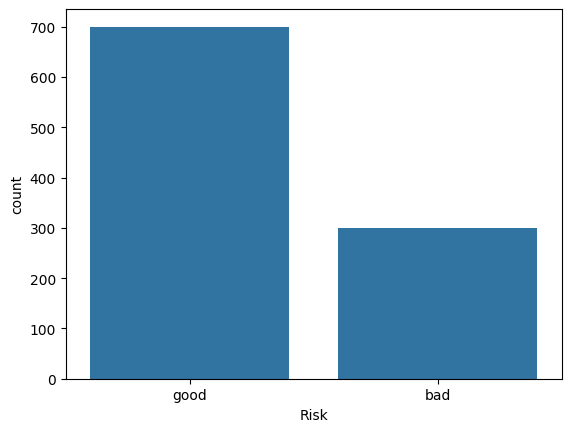

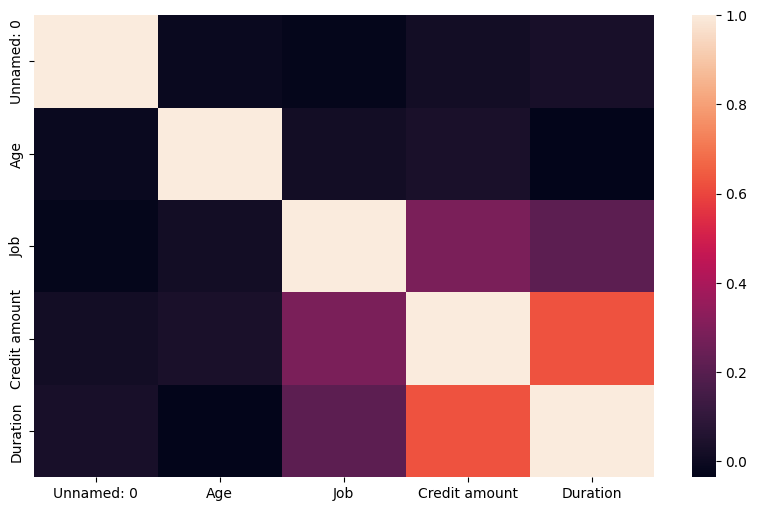

In [ ]:
df.isna().sum().sort_values(ascending=False).head(10)
df.describe(include="all").T

# Cek target (umumnya 'Risk')
df["Risk"].value_counts()

sns.countplot(x="Risk", data=df)
plt.show()

# contoh korelasi untuk kolom numerik
num_cols = df.select_dtypes(include="number").columns
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=False)
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## Load ulang dataset khusus preprocessing

In [ ]:
import pandas as pd

df = pd.read_csv("german_credit_data_raw.csv")
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


## Buang kolom index palsu (Unnamed)

In [ ]:
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


## Tangani missing value yang umum di dataset


In [ ]:
for col in ["Saving accounts", "Checking account"]:
    if col in df.columns:
        df[col] = df[col].fillna("unknown")

df.isna().sum()

,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,0
Checking account,0
Credit amount,0
Duration,0
Purpose,0
Risk,0


## Hapus duplikat

In [ ]:
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]

print("Rows before:", before)
print("Rows after :", after)


Rows before: 1000
Rows after : 1000


## Pisahkan fitur (X) dan target (y)

In [ ]:
TARGET = "Risk"
assert TARGET in df.columns, "Kolom target 'Risk' tidak ditemukan!"

X = df.drop(columns=[TARGET])
y = df[TARGET].map({"good": 0, "bad": 1})

print("Target distribution (0=good, 1=bad):")
print(y.value_counts())


Target distribution (0=good, 1=bad):
Risk
0    700
1    300
Name: count, dtype: int64


## Identifikasi kolom numerik dan kategorikal

In [ ]:
import numpy as np

numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numerical cols:", numerical_cols)
print("Categorical cols:", categorical_cols)


Numerical cols: ['Age', 'Job', 'Credit amount', 'Duration']
Categorical cols: ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']


## Buat preprocessing pipeline (imputer + scaler + onehot)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, numerical_cols),
    ("cat", categorical_pipeline, categorical_cols)
])


## Train-test split (pakai stratify)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train target distribution (normalized):")
print(y_train.value_counts(normalize=True))
print("\nTest target distribution (normalized):")
print(y_test.value_counts(normalize=True))


Train target distribution (normalized):
Risk
0    0.7
1    0.3
Name: proportion, dtype: float64

Test target distribution (normalized):
Risk
0    0.7
1    0.3
Name: proportion, dtype: float64


## Fit-transform train dan transform test

In [ ]:
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

print("Shape X_train_prep:", X_train_prep.shape)
print("Shape X_test_prep :", X_test_prep.shape)


Shape X_train_prep: (800, 26)
Shape X_test_prep : (200, 26)


##Simpan hasil preprocessing

In [ ]:
import os
import joblib
import numpy as np

output_dir = "german_credit_data_preprocessing"
os.makedirs(output_dir, exist_ok=True)

# Mengubah dari sparse.save_npz menjadi np.save untuk menyimpan numpy array dense
np.save(os.path.join(output_dir, "X_train.npy"), X_train_prep)
np.save(os.path.join(output_dir, "X_test.npy"), X_test_prep)

pd.Series(y_train).to_csv(os.path.join(output_dir, "y_train.csv"), index=False)
pd.Series(y_test).to_csv(os.path.join(output_dir, "y_test.csv"), index=False)

joblib.dump(preprocessor, os.path.join(output_dir, "preprocessor.joblib"))

print(f"✅ Saved outputs to: {output_dir}")

✅ Saved outputs to: german_credit_data_preprocessing


In [ ]:
%%writefile automate_Reinoufal-Ramadhan.py
# isi file python dimulai dari sini

import argparse
import os
import json
import joblib
import numpy as np
import pandas as pd
from scipy import sparse

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer


def build_preprocessor(X: pd.DataFrame) -> ColumnTransformer:
    numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

    numeric_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
    ])

    categorical_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
    ])

    preprocessor = ColumnTransformer([
        ("num", numeric_pipeline, numerical_cols),
        ("cat", categorical_pipeline, categorical_cols),
    ])

    return preprocessor, numerical_cols, categorical_cols


def preprocess(input_path: str, target_col: str, output_dir: str,
               test_size: float = 0.2, random_state: int = 42, stratify: bool = True) -> None:
    df = pd.read_csv(input_path)

    if "Unnamed: 0" in df.columns:
        df = df.drop(columns=["Unnamed: 0"])

    for col in ["Saving accounts", "Checking account"]:
        if col in df.columns:
            df[col] = df[col].fillna("unknown")

    df = df.drop_duplicates()

    if target_col not in df.columns:
        raise ValueError(f"Target '{target_col}' tidak ditemukan. Kolom tersedia: {list(df.columns)}")

    X = df.drop(columns=[target_col])
    y_raw = df[target_col]

    y = y_raw.map({"good": 0, "bad": 1})
    if y.isna().any():
        raise ValueError(
            "Ada label target yang tidak dikenali. Pastikan target hanya 'good'/'bad'. "
            f"Label unik: {sorted(y_raw.unique().tolist())}"
        )

    stratify_y = y if stratify else None
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=stratify_y
    )

    preprocessor, numerical_cols, categorical_cols = build_preprocessor(X_train)

    X_train_prep = preprocessor.fit_transform(X_train)
    X_test_prep = preprocessor.transform(X_test)

    os.makedirs(output_dir, exist_ok=True)

    # Simpan output preprocessing (dense) sebagai .npy
    np.save(os.path.join(output_dir, "X_train.npy"), X_train_prep)
    np.save(os.path.join(output_dir, "X_test.npy"), X_test_prep)

    pd.Series(y_train).to_csv(os.path.join(output_dir, "y_train.csv"), index=False)
    pd.Series(y_test).to_csv(os.path.join(output_dir, "y_test.csv"), index=False)

    joblib.dump(preprocessor, os.path.join(output_dir, "preprocessor.joblib"))

    meta = {
        "input_path": input_path,
        "target_col": target_col,
        "rows": int(df.shape[0]),
        "n_features_raw": int(X.shape[1]),
        "n_features_after_onehot": int(X_train_prep.shape[1]),
        "numerical_cols": numerical_cols,
        "categorical_cols": categorical_cols,
        "test_size": test_size,
        "random_state": random_state,
        "stratify": stratify,
    }

    with open(os.path.join(output_dir, "schema.json"), "w", encoding="utf-8") as f:
        json.dump(meta, f, indent=2)

    print("✅ Preprocessing selesai.")
    print("Saved to:", output_dir)
    print("X_train_prep:", X_train_prep.shape, "| X_test_prep:", X_test_prep.shape)




def main():
    parser = argparse.ArgumentParser()
    parser.add_argument("--input", required=True, help="Path file CSV raw")
    parser.add_argument("--target", default="Risk", help="Nama kolom target (default: Risk)")
    parser.add_argument("--output", required=True, help="Folder output preprocessing")
    parser.add_argument("--test-size", type=float, default=0.2)
    parser.add_argument("--random-state", type=int, default=42)
    parser.add_argument("--no-stratify", action="store_true")
    args = parser.parse_args()

    preprocess(
        input_path=args.input,
        target_col=args.target,
        output_dir=args.output,
        test_size=args.test_size,
        random_state=args.random_state,
        stratify=(not args.no_stratify),
    )


if __name__ == "__main__":
    main()


Writing automate_Reinoufal-Ramadhan.py


In [ ]:
!python automate_Reinoufal-Ramadhan.py \
  --input /content/german_credit_data_raw.csv \
  --target Risk \
  --output /content/german_credit_data_preprocessing


✅ Preprocessing selesai.
Saved to: /content/german_credit_data_preprocessing
X_train_prep: (800, 26) | X_test_prep: (200, 26)


In [ ]:
!ls /content/german_credit_data_preprocessing


preprocessor.joblib  X_test.npy   y_test.csv
schema.json	     X_train.npy  y_train.csv
